This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

Understanding customer needs and targeting specific clusters of customers based on their need is one way for company to increase number of customers and also to gain more profits.Since,purchase history of customers is already avaialble in the dataset, it can use RFM analysis for customer segmention. Even though there are so many different methods for customer segmentation,RFM analysis is being used because it utilizes numerical values to show Customer recency,frequency and monetary values and also the output results are easy to interpret.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore') 

In [3]:
data = pd.read_csv("/kaggle/input/ecommerce-data/data.csv",encoding= 'unicode_escape')

In [4]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [5]:
data.shape

(541909, 8)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [7]:
data.isnull().sum().sort_values(ascending=False)

CustomerID     135080
Description      1454
InvoiceNo           0
StockCode           0
Quantity            0
InvoiceDate         0
UnitPrice           0
Country             0
dtype: int64

##### *CustomerID has many Nan values we have to remove it*

In [8]:
# Dropping the missing value in customerId .
data.dropna(axis = 0, inplace=True)

In [9]:
data.describe().T.style.background_gradient(cmap='Blues')

,count,mean,std,min,25%,50%,75%,max
Quantity,406829.000000,12.061303,248.693370,-80995.000000,2.000000,5.000000,12.000000,80995.000000
UnitPrice,406829.000000,3.460471,69.315162,0.000000,1.250000,1.950000,3.750000,38970.000000
CustomerID,406829.000000,15287.690570,1713.600303,12346.000000,13953.000000,15152.000000,16791.000000,18287.000000


*Quantity column has values in negative*

In [10]:
data[(data["Quantity"] < 0)]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,12/9/2011 9:57,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,12/9/2011 10:28,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,12/9/2011 11:57,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,12/9/2011 11:58,1.25,17315.0,United Kingdom


*Invoice number: a number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
That's the reason quantity column showing negative values*

In [11]:
data = data[(data["Quantity"] > 0)]

In [12]:
data.describe().T.style.background_gradient(cmap='Blues')

,count,mean,std,min,25%,50%,75%,max
Quantity,397924.000000,13.021823,180.420210,1.000000,2.000000,6.000000,12.000000,80995.000000
UnitPrice,397924.000000,3.116174,22.096788,0.000000,1.250000,1.950000,3.750000,8142.750000
CustomerID,397924.000000,15294.315171,1713.169877,12346.000000,13969.000000,15159.000000,16795.000000,18287.000000


*Now there is no negative values in our dataset*

## Data Visualization

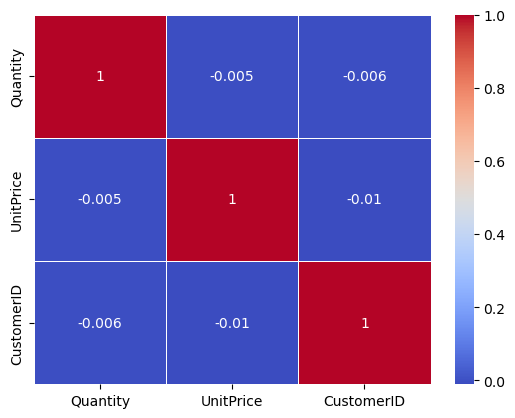

In [13]:
sns.heatmap(data.corr(),annot=True,linewidths=.5,fmt='.1g',cmap= 'coolwarm')
plt.show()

*We can observe that UnitPrice does'nt has high correlation with any feature*

##### *Which Country has maximum sales ?*

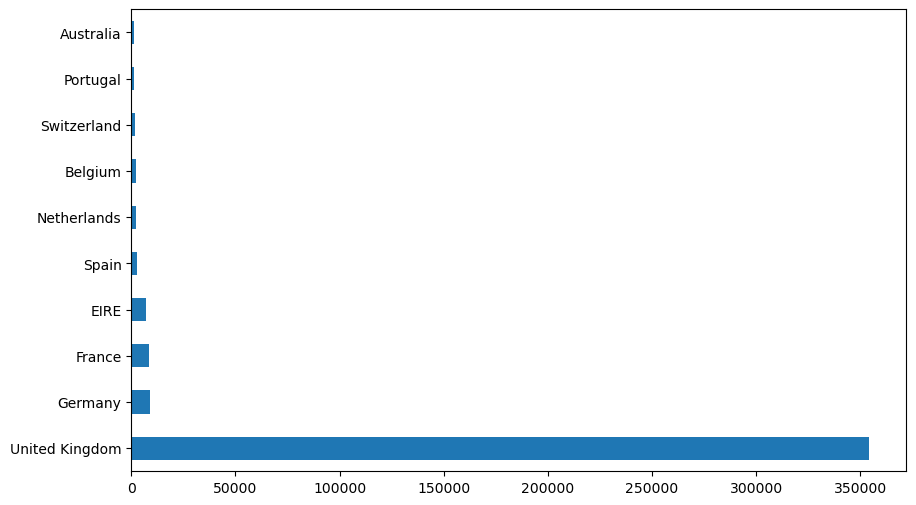

In [14]:
plt.figure(figsize=(10,6))
data['Country'].value_counts()[0:10].sort_values(ascending=False).plot(kind='barh')
plt.show()

*United Kindom has maximum sales*

#### *TOP 10 products which has highest sales*

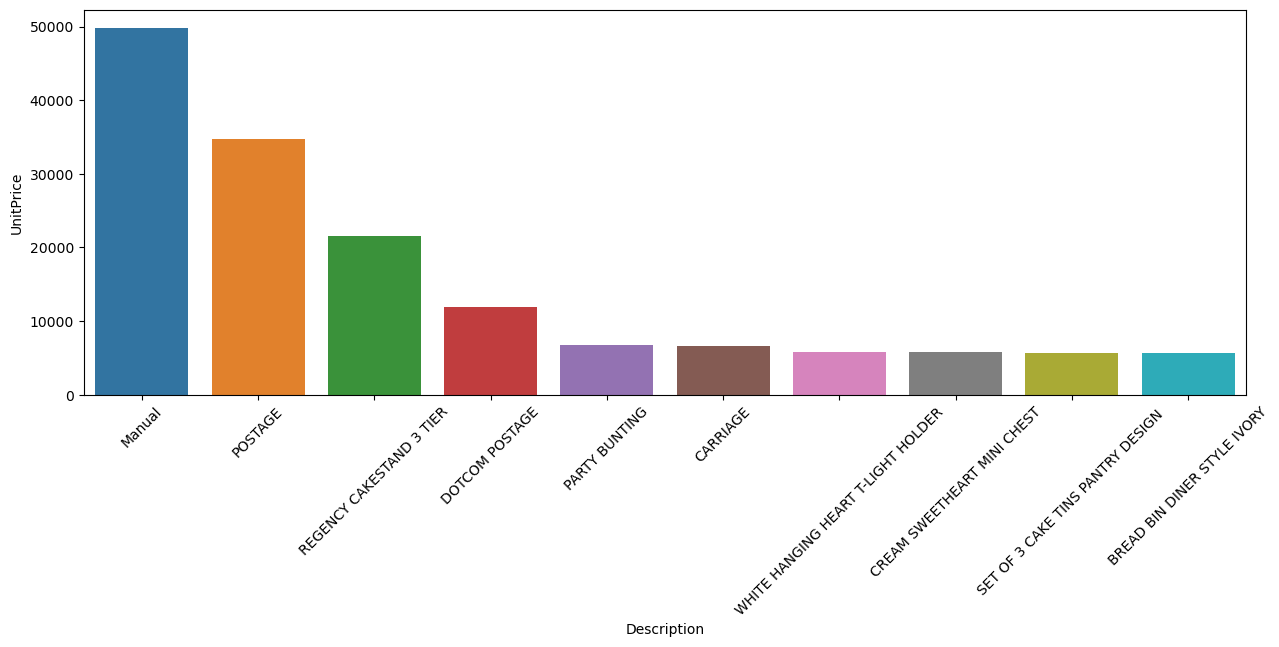

In [15]:
tp = data.groupby('Description',as_index=False)['Quantity','UnitPrice'].sum().sort_values(by='UnitPrice',ascending=False)
plt.figure(figsize=(15,5))
sns.barplot(data=tp[0:10], x='Description', y='UnitPrice')
plt.xticks(rotation=45)
plt.show()

*Some descriptions are just Manual and not items.*

#### Which month has maximum sales ?

In [16]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])    # first convert object column into datetime column
from datetime import  datetime as dt

data['day'] = data['InvoiceDate'].dt.day_name()
data['month'] = data['InvoiceDate'].dt.month_name()
data['weekday'] = data['InvoiceDate'].dt.weekday 
data['year'] = data['InvoiceDate'].dt.year
data['order_month_year'] = data['InvoiceDate'].dt.to_period('M')

data['Hour'] = (data['InvoiceDate']).dt.hour   # extract hour

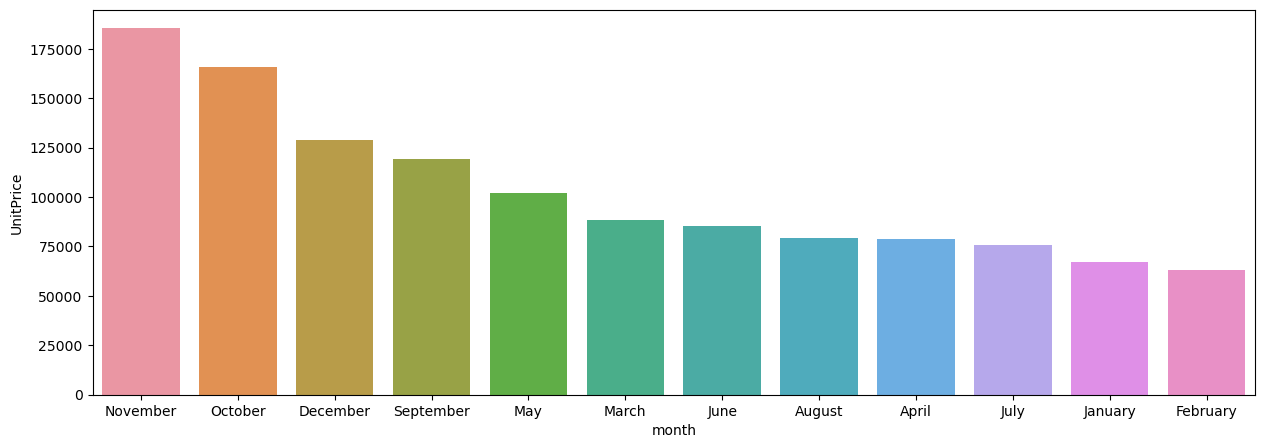

In [17]:
m = data.groupby('month',as_index=False)['Quantity','UnitPrice'].sum().sort_values(by='UnitPrice',ascending=False)
plt.figure(figsize=(15,5))
sns.barplot(data=m, x='month',y='UnitPrice')
plt.show()

*Month November has Maximum sales*

#### Which year sale has maximum ?

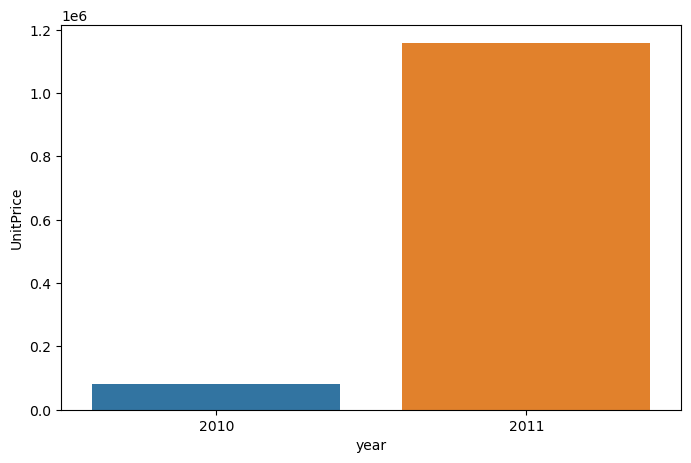

In [18]:
y = data.groupby('year',as_index=False)['Quantity','UnitPrice'].sum().sort_values(by='UnitPrice',ascending=False)
plt.figure(figsize=(8,5))
sns.barplot(data=y, x='year',y='UnitPrice')
plt.show()

*Year 2011 has most sales*

#### Which week has maximum sales ?

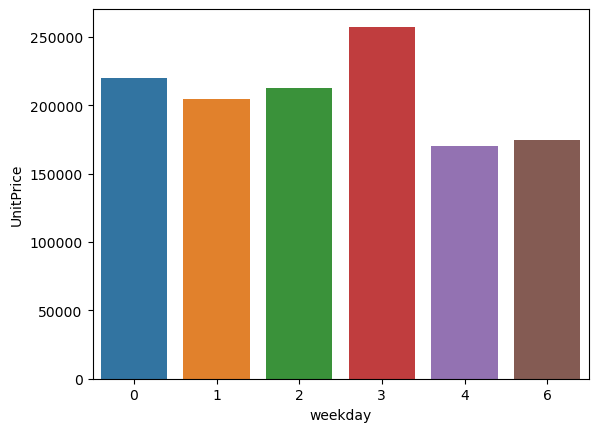

In [19]:
w = data.groupby('weekday',as_index=False)['Quantity','UnitPrice'].sum().sort_values(by='UnitPrice',ascending=False)
sns.barplot(data=w, x='weekday',y='UnitPrice')
plt.show()

*Sales are maximum on Thursday followed by Monday*

#### Busiest hour in a day ?

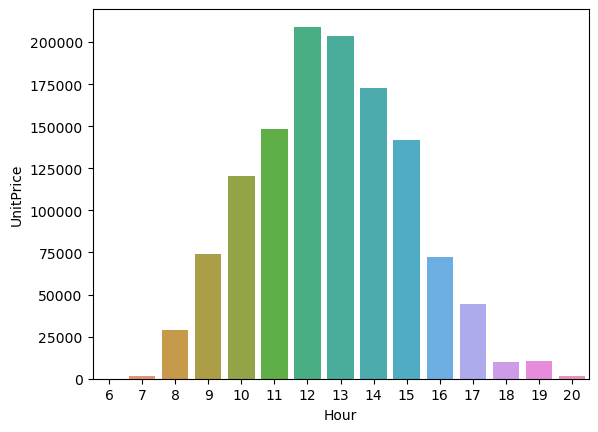

In [20]:
h = data.groupby('Hour',as_index=False)['Quantity','UnitPrice'].sum().sort_values(by='UnitPrice',ascending=False)
sns.barplot(data=h, x='Hour',y='UnitPrice')
plt.show()

*12 pm is busiest hour in a day*

RFM (Recency, Frequency, Monetary) analysis is a behavior-based approach grouping customers into segments. It groups the customers on the basis of their previous purchase transactions. How recently, how often, and how much did a customer buy. RFM filters customers into various groups for the purpose of better service. It helps managers to identify potential customers to do more profitable business. 

* Recency (R): Who have purchased recently? Number of days since last purchase (least recency)
* Frequency (F): Who has purchased frequently? It means the total number of purchases. ( high frequency)
* Monetary Value(M): Who have high purchase amount? It means the total money customer spent (high monetary value)

In [21]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])    # first convert object column into datetime column

In [22]:
df = data[['CustomerID','InvoiceDate','Quantity','UnitPrice']]

In [23]:
df.head()

,CustomerID,InvoiceDate,Quantity,UnitPrice
0,17850.0,2010-12-01 08:26:00,6,2.55
1,17850.0,2010-12-01 08:26:00,6,3.39
2,17850.0,2010-12-01 08:26:00,8,2.75
3,17850.0,2010-12-01 08:26:00,6,3.39
4,17850.0,2010-12-01 08:26:00,6,3.39


In [24]:
# Recency
df['InvoiceDate'].max()  

Timestamp('2011-12-09 12:50:00')

*Last date was 2011-12-09 we have to choose present time set slightly above than the last order time*

In [25]:
from datetime import datetime
present = datetime(2011,12,10)

In [26]:
# Monetary
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

In [27]:
seg = df.groupby('CustomerID').agg({'InvoiceDate': lambda date: (present - date.max()).days,
                                        'CustomerID': lambda num: len(num),
                                        'TotalPrice': lambda price: price.sum()})

In [28]:
seg.columns=['recency', 'frequency','monetary']

In [29]:
seg.head()

,recency,frequency,monetary
CustomerID,,,
12346.0,325,1,77183.60
12347.0,2,182,4310.00
12348.0,75,31,1797.24
12349.0,18,73,1757.55
12350.0,310,17,334.40


In [30]:
(present - datetime(2011,9,25)).days==76         # CustomerID 12348.0

True

*Inserting the date of Order Customer Id 12348.0 purchase and comparing it to the number of days in the seg table we verify our RFM table is correct.*

### Determining RFM Quartiles

In [31]:
quantiles = seg.quantile(q=[0,0.25,0.5,0.75,1])

In [32]:
quantiles

,recency,frequency,monetary
0.00,0.0,1.0,0.000
0.25,17.0,17.0,307.245
0.50,50.0,41.0,674.450
0.75,141.5,100.0,1661.640
1.00,373.0,7847.0,280206.020


*Quantiles values are not repeated now we can use pandas qcut library*

#### *Customers with the lowest recency, highest frequency and monetary amounts considered as top customers.*

In [33]:
seg['r_value'] = pd.qcut(seg['recency'], 4, ['1','2','3','4'])
seg['f_value'] = pd.qcut(seg['frequency'], 4, ['4','3','2','1'])
seg['m_value'] = pd.qcut(seg['monetary'], 4, ['4','3','2','1'])

In [34]:
seg['RFM'] = seg['r_value'].astype(str) + seg['f_value'].astype(str) + seg['m_value'].astype(str)

In [35]:
seg['RFM_Total'] = seg['r_value'].astype(int) + seg['f_value'].astype(int) + seg['m_value'].astype(int)

In [36]:
seg.head()

,recency,frequency,monetary,r_value,f_value,m_value,RFM,RFM_Total
CustomerID,,,,,,,,
12346.0,325,1,77183.60,4,4,1,441,9
12347.0,2,182,4310.00,1,1,1,111,3
12348.0,75,31,1797.24,3,3,1,331,7
12349.0,18,73,1757.55,2,2,1,221,5
12350.0,310,17,334.40,4,4,3,443,11


In [37]:
display(seg['RFM'].unique())
print(seg['RFM'].nunique())

array(['441', '111', '331', '221', '443', '444', '422', '211', '132',
       '311', '333', '122', '433', '144', '322', '232', '143', '332',
       '121', '421', '233', '223', '222', '243', '432', '431', '244',
       '343', '133', '341', '321', '334', '342', '411', '434', '213',
       '131', '344', '242', '312', '123', '313', '442', '141', '231',
       '212', '324', '412', '423', '112', '142', '234', '134', '113',
       '424', '323', '224', '124', '241', '413', '114'], dtype=object)

61


*There are 61 groups formed*

In [38]:
seg['RFM_Total'].unique()

array([ 9,  3,  7,  5, 11, 12,  8,  4,  6, 10])

*We found 10 unique groups of customer*

*As we know the customer who purchase recenty has the score 1, the customer who purchase many times has the score 1, the customer who spent more has score 1 according to that we classify the customer*

In [57]:
def classify_customer(df):
    if (df['RFM_Total'] == 3):
        return 'Top customers'   
    elif (df['RFM_Total'] == 4):
        return 'Best customers'
    elif (df['RFM_Total'] == 5):
            return "Good customers"
    elif (df['RFM_Total'] == 6):
            return "Promising customer"
    elif (df['RFM_Total'] == 7):
            return "Recent customer"
    elif (df['RFM_Total'] == 8):
            return "Customer needs attention"
    elif (df['RFM_Total'] == 9):
            return "Can't lose them"
    elif (df['RFM_Total'] == 10):
            return "Don't lose them" 
    elif (df['RFM_Total'] == 11):
            return "We lose them"    
    else:
        return "lost"

In [58]:
seg['Customer_Segmentation'] = seg.apply(classify_customer,axis=1)

In [59]:
seg.sample(5)

,recency,frequency,monetary,r_value,f_value,m_value,RFM,RFM_Total,Customer_Segmentation
CustomerID,,,,,,,,,
13599.0,1,247,5153.67,1,1,1,111,3,Top customers
13193.0,61,29,117.88,3,3,4,334,10,Don't lose them
13334.0,82,268,3536.82,3,1,1,311,5,Good customers
13969.0,7,626,9053.94,1,1,1,111,3,Top customers
16754.0,372,2,2002.40,4,4,1,441,9,Can't lose them


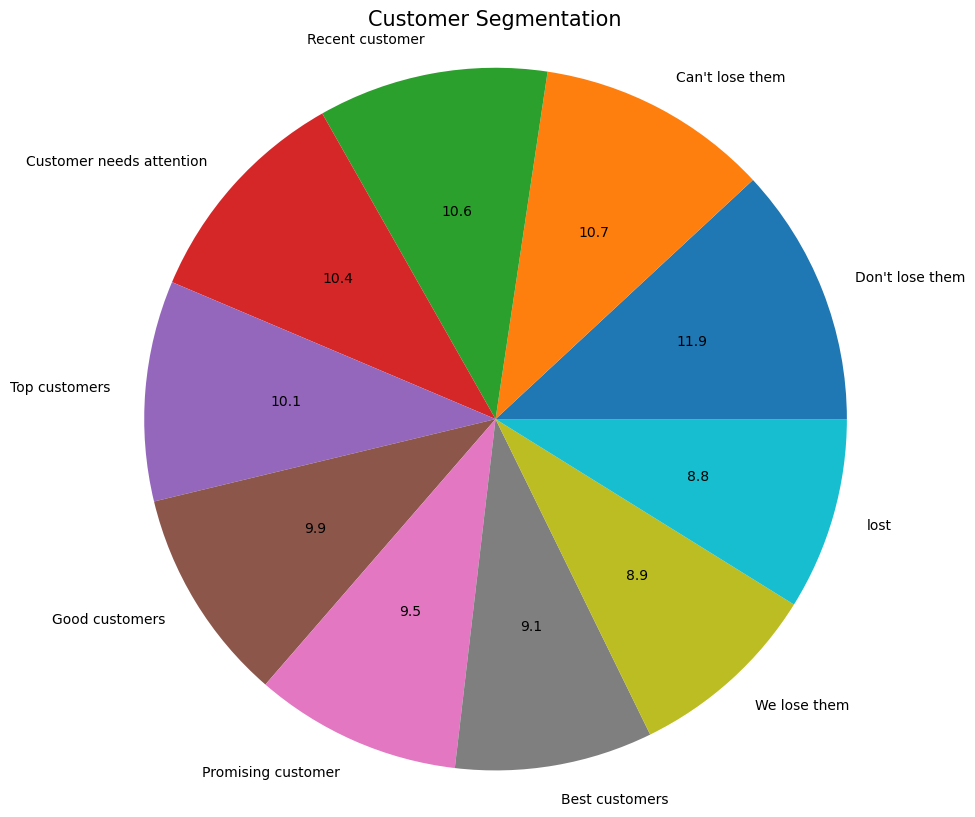

In [61]:
plt.figure(figsize=(10,10))
seg['Customer_Segmentation'].value_counts().plot(kind='pie',autopct='%.1f')
plt.title("Customer Segmentation",size=15)
plt.ylabel(" ")
plt.axis('equal') 
plt.show()

### Who are the top 5 best customers? by RFM Class 111 who buy recently and frequently?

In [43]:
seg[seg['RFM'] == '111'].sort_values('monetary',ascending=False).head()

,recency,frequency,monetary,r_value,f_value,m_value,RFM,RFM_Total,Customer_Segmentation
CustomerID,,,,,,,,,
14646.0,1,2080,280206.02,1,1,1,111,3,Top customers
18102.0,0,431,259657.30,1,1,1,111,3,Top customers
17450.0,8,337,194550.79,1,1,1,111,3,Top customers
14911.0,1,5677,143825.06,1,1,1,111,3,Top customers
14156.0,9,1400,117379.63,1,1,1,111,3,Top customers
